## ***Enivormental Enthusiasts of Pittsburgh***

*By Sruthi Malineni and Jonathan Coulter*

![earth](https://media.giphy.com/media/LRxBjX4hiysIAgFnpK/giphy.gif)

---

# **Introduction**

**Motivation:**

Our goal with this project was to determine which neighborhood in Pittsburgh is the "best" accoring to their environmental quality. We believe that the environment is one of the most important factors to consider when choosing a place of residence.

**Context:**

With the recent deterioration of the climate and environment, it has become imperitive to consider the environemntal consequences of your housing choices. Furthermore, there has been an increase in the number of people who prefer to live in areas that are surrounded by greenery and nature.

**Approach:**

Our approach to solving this dilemma about which neighborhood in Pittsburgh invloved using several data sets that adequately represent the environmental quality of these areas.

**Alternatives:**

We also considered incorporating the Allegheny County Air Quality dataset; however, we felt this information would be less significant in concluding the neighborhood with the greatest environmental quality. We feel that the density of trees serves as an indicator of air quality, which would make the use of air quality as a primary metric redundant.

---

# **The Metric**

Our primary metric we are using to determing the "best" neighborhood in Pittsburgh is environemental quality. The submetrics we are using to determine environmental quality are tree diversity, number of trees, and percent of land used for parks in each neighborhood.

We used the Trees and Neighborhoods datasets to find the total number of trees and the different types of trees in each neighborhood. We also used the City of Pittsburgh Parks, Parks, and Neighborhoods datasets to find the percentage of land that each neighborhood used for parks. We believe these submetrics to be strong indicators of our primary metric which is environmental quality in each neighborhood.

**Datasets:** \
Trees - Lists the location and type of the tree for each tree present in the dataset. \
Neighborhoods - Lists the name of neighborhoods in Pittsburgh and their acreage. \
City of Pittsburgh Parks - Lists the name of all the parks in Pittsburgh and the neighborood they are located in. \
Parks - Lists all the parks in Pittsburgh and their acreage.


---

# **The Analysis**

**Percent of Land Used For Parks**

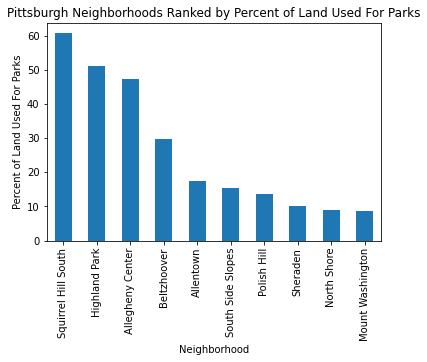

In [6]:
import pandas as pd

# creating dataframe for each of the datasets used in this analysis
parks_area = pd.read_table("Parks.csv", sep = ",")
parks_nbhd = pd.read_table("ParksNeighborhoods.csv", sep = ",")
nbhd_sizes = pd.read_table("NeighborhoodSizes.csv", sep = ",")

# a bunch of dictionaries used to connect information between datasets

parks_dict = {
    # contains park -> neighborhood
}

parksize_dict = {
    # contains park -> size
}

size_dict = {
    # contains neighborhood -> total park area
}

nbhd_size_dict = {
    # contains neighborhood -> neighborhood area
}


# dictionary used to create the dataframe for analysis
nbhd_dict = {
    "nbhd_name": [],
    "nbhd_size": [],
    "total_park_area": [],
    "percent_park_area": []
}

# looping through ParksNeighborhoods.csv to create dictionary with the neighborhood each park is located in
for index, row in parks_nbhd.iterrows():
    parks_dict[row["name"]] = row["neighborhood"]
    
    
# looping through Parks.csv to create dictionary with each park's individual size
for index, row in parks_area.iterrows():       
    parksize_dict[row["updatepknm"]] = row["acreage"]

    
# using neighborhoods associated with park names from parks_dict to create dictionary with each neighborhoods total park area
for park in parks_dict:
    if park in parks_dict and park in parksize_dict:
        if parks_dict[park] in size_dict:
            size_dict[parks_dict[park]] += parksize_dict[park]
        else:
            size_dict[parks_dict[park]] = parksize_dict[park]

            
# looping through NeighborhoodSizes.csv to create dictionary with each neighborhood's size in acres
for index, row in nbhd_sizes.iterrows():
    if row["hood"] in size_dict:
        nbhd_size_dict[row["hood"]] = row["acres"]
            
            
# using all the dictionaries to create a cohesive dictionary to make a dataframe out of            
for neighborhood in size_dict:
    nbhd_dict["nbhd_name"].append(neighborhood)
    nbhd_dict["nbhd_size"].append(nbhd_size_dict[neighborhood])
    nbhd_dict["total_park_area"].append(size_dict[neighborhood])        
    if nbhd_size_dict[neighborhood] != 0:
        nbhd_dict["percent_park_area"].append(size_dict[neighborhood] / nbhd_size_dict[neighborhood] * 100)
    else:
        nbhd_dict["percent_park_area"].append(0)       

        
# now have all necessary info to make a dataframe using nbhd_dict
data = pd.DataFrame(nbhd_dict)
data = data.set_index("nbhd_name")
data = data.sort_values(by = ["percent_park_area"], ascending = False)


#display(data.head(70))
#print(data.to_string()) #to show full dataframe

display(data["percent_park_area"].head(10).plot(kind = "bar", ylabel = "Percent of Land Used For Parks", xlabel = "Neighborhood", title = "Pittsburgh Neighborhoods Ranked by Percent of Land Used For Parks"))


In this section the percent of land used for parks in each neighborhood was determined by using dictionaries to create links between park names, their sizes, their location (neighborhood), and the size of that neighborhood. Using these metrics, a dataframe was created using pandas. With this data, a new column was calculated that was the percent of each neighborhoods total land that is used for parks in total. The total land used for parks was found by adding up the size of each park associated with each neighborhood.

---

**Number of Trees**

Text(0.5, 1.0, 'Tree Quantity Across Pittsburgh')

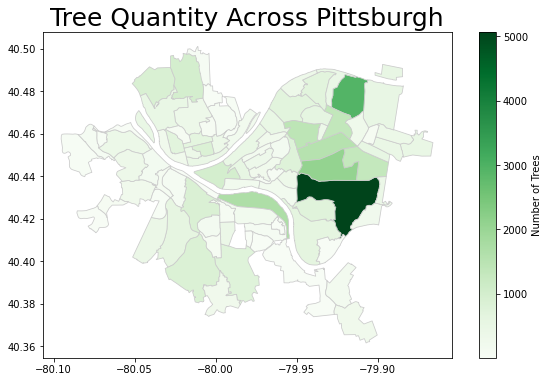

In [7]:
import geopandas
import matplotlib.pyplot as plt
%matplotlib inline

#DataFrame for the entire Trees dataset.
treesData = pd.read_csv("Trees.csv", low_memory = False)

#create dictionary to find out how many trees are in each neighborhood
treesdict = {}

#looping through the dataframe of the entire trees dataset and adding up all instances where the neighborhood appears
#to determine how many trees per neighborhood
for index, row in treesData.iterrows():
    if row['neighborhood'] in treesdict.keys():
        treesdict[row['neighborhood']] += 1
    else:
        treesdict[row['neighborhood']] = 1
        
#dataframe with the number of trees for each neighborhood
treesDf = pd.DataFrame(treesdict.items(), columns = ['Neighborhood','Number_of_trees'])

#a graph of the neighborhoods without the tree data
neighborhoods = geopandas.read_file("Neighborhoods_.shp")

#orders the number of trees for each neighborhood in descending order
num_trees = treesDf.groupby("Neighborhood").sum()['Number_of_trees']
num_trees.sort_values(ascending=False)

# merges the num_trees to create the map
trees_map = neighborhoods.merge(num_trees, how='left', left_on='hood', right_on='Neighborhood')

# set a variable that will call whatever column we want to visualise on the map
variable = 'Number_of_trees'
# set the range for the choropleth
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 6))

#color codes and labels the map for easy visualization
trees_map.plot(column=variable, cmap='Greens', legend = True, legend_kwds={'label': "Number of Trees"}, 
               linewidth=0.8,ax=ax,figsize=(15, 10), edgecolor='0.8')
ax.set_title('Tree Quantity Across Pittsburgh', fontdict={'fontsize': '25', 'fontweight' : '3'})

To calculate the number of trees present in each neighborhood, a data frame was created using the Trees.csv file. Then a for loop was used to traverse the data frame and to populate the dictionary with the number of instances the neighborhood occurred in the data set. Afterwords, I generated a map using pandas for data visualization that shows the distribution of the number of trees in each neighborhood across Pittsburgh.

---

**Tree Variety**

Text(0.5, 1.0, 'Tree Variety Distribution Across Pittsburgh')

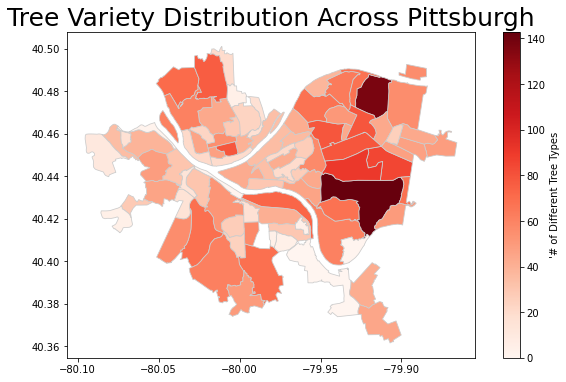

In [8]:
#dictionary for the variety of trees
treeVarDict = {}

#loops through the entire dataframe for Trees.csv
for index, row in treesData.iterrows():
    if row['neighborhood'] not in treeVarDict:
        #creates a list and stores the variety of tree for each neighborhood
        treeVarDict[row['neighborhood']] = list()
    elif row['scientific_name'] in treeVarDict[row['neighborhood']]:
        #if the variety of the tree already exists in the list for the variable nothing happens
        rand = 0
    else:
        #if the variety of the tree does not already exist in the list for the variable then the variety is added to the list
        treeVarDict[row['neighborhood']].append(row['scientific_name'])

#dataframe for the neighborhoods and the different variety of trees in the neighborhood
treesVarDf = pd.DataFrame(treeVarDict.items(), columns = ['Neighborhood','Type of Tree'])

#dictionary for the count of different type of trees in each neighborhood
typeDict = {}

#loops through the treesVarDf to count up the types of trees in each neighborhood
for index, row in treesVarDf.iterrows():
    typeDict[row['Neighborhood']] = len(row['Type of Tree'])

#dataframe for the number of different tree types for each neighborhood
typeNumDf = pd.DataFrame(typeDict.items(), columns = ['Neighborhood','# of Different Tree Types'])

#orders the number of types for each neighborhood in descending order
num_type = typeNumDf.groupby("Neighborhood").sum()['# of Different Tree Types']
num_type.sort_values(ascending=False)

# do the merge
type_map = neighborhoods.merge(num_type, how='left', left_on='hood', right_on='Neighborhood')

# set a variable that will call whatever column we want to visualise on the map
variable = '# of Different Tree Types'
# set the range for the choropleth
vmin, vmax = 120, 220
fig, ax = plt.subplots(1, figsize=(10, 6))

#color codes and labels the map for easy visualization
type_map.plot(column=variable, cmap='Reds', legend = True, legend_kwds={'label': "'# of Different Tree Types"}, 
               linewidth=0.8,ax=ax,figsize=(15, 10), edgecolor='0.8')
ax.set_title('Tree Variety Distribution Across Pittsburgh', fontdict={'fontsize': '25', 'fontweight' : '3'})

To determine the number of different tree types in each neighborhood, I traversed the Trees.csv file using a for loop and populated a dictionary with the neighborhood as the keys and a list containing the different tree species in that neighborhood as the values. Then, I generated a map using data visualization with pandas to create a map of Pittsburgh showing the distribution of different tree types across the neighborhoods

---

# **The Best Neighborhood**


<img src="percent parks.png" style="width:310px;height:250px"/>

<img src="numbertrees.png" style="width:360px;height:250px"/>

<img src="treevariety.png" style="width:360px;height:250px"/>

We concluded that the best neighborhood in Pittsburgh according to environmental quality is Squirrel Hill South. Squirrel Hill South has the most tree diversity, greatest number of trees, and the highest percent of its land used for parks.

Squirrel Hill South has 5,073 trees of 143 different types and 60.72% of its land is used for parks.

A close second place would be Highland Park, which scored immediately after Squirrel Hill South in every category.

Highland Park has 2,941 trees of 137 different types and 51.23% of its land is used for parks.

---

# **Conclusion**

**Jonathan** - My personal favorite neighborhood in Pittsburgh is Homesead because I enjoy going to the Waterfront and exploring all the shops and going to restaurants. After concluding which nieghborhood in Pittsburgh is the best based on the environment, we have concluded that my personal favorite neighborhood and our determined "best" neighborhood are not the same since my favorite is Homestead and the "best" is Squirrel Hill South.

**Sruthi** - My personal favorite Pittsburgh neighborhood is Squirrel Hill South because it is a great area to go on walks and explore different stores. My favorite neighborhood is also the "best neighborhood" according to our data analysis. Our data showed that Squirrel Hill South is the most environmentally friendly. This is inline with one of the reasons why I love Squirrel Hill South because it is very scenic.

---

![ty](https://media.giphy.com/media/apbnzaN01uPJzkSiqs/giphy.gif)